# **Plotting residuals for the solver "datadriven_wmSimpleFoam"**

1. Data-driven wall function with additional correction at the first face (wall and face blending)

2. Data-driven wall function with additional correction at the first face (only face blending)

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
model = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
solverInfo_path = [run + 'flatPlate_1stFaceCorrection/turbulentFlatPlate_1stface_wallAndFaceblend/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,nuTilda_solver,nuTilda_initial,nuTilda_final,nuTilda_iters,nuTilda_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.087753,6,0.000000,0.000000,0,False,smoothSolver,1.000000,0.032162,1,True,GAMG,1.000000,0.088166,13,True
1,2,smoothSolver,0.690943,0.018958,1,0.157834,0.014315,2,False,smoothSolver,0.150162,0.009422,2,True,GAMG,0.009472,0.000939,12,True
2,3,smoothSolver,0.040569,0.002791,4,0.148206,0.013164,2,False,smoothSolver,0.075889,0.003960,3,True,GAMG,0.003534,0.000270,6,True
3,4,smoothSolver,0.040349,0.002748,5,0.077276,0.005029,3,False,smoothSolver,0.055308,0.003542,3,True,GAMG,0.006954,0.000434,4,True
4,5,smoothSolver,0.020461,0.001610,6,0.054720,0.003639,3,False,smoothSolver,0.039832,0.002728,3,True,GAMG,0.006123,0.000568,3,True


In [4]:
solverInfo_path2 = [run + 'flatPlate_1stFaceCorrection/turbulentFlatPlate_1stface_wallfixFaceblend/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data2 = [pd.read_csv(solverInfo_path2[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data2[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,nuTilda_solver,nuTilda_initial,nuTilda_final,nuTilda_iters,nuTilda_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.087753,6,0.000000,0.000000,0,False,smoothSolver,1.000000,0.032162,1,True,GAMG,1.000000,0.088166,13,True
1,2,smoothSolver,0.443510,0.039846,1,0.157989,0.014327,2,False,smoothSolver,0.150162,0.009422,2,True,GAMG,0.009234,0.000523,13,True
2,3,smoothSolver,0.154924,0.010809,4,0.149791,0.013393,2,False,smoothSolver,0.077318,0.004082,3,True,GAMG,0.003377,0.000227,9,True
3,4,smoothSolver,0.080496,0.007653,4,0.057556,0.005125,2,False,smoothSolver,0.055582,0.003527,3,True,GAMG,0.066525,0.003554,4,True
4,5,smoothSolver,0.033323,0.003067,6,0.038739,0.002829,2,False,smoothSolver,0.040737,0.002781,3,True,GAMG,0.106516,0.007615,4,True


In [5]:
Ux_init_res = [solverInfo_data[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res = [solverInfo_data[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res = [solverInfo_data[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
nuTilda_init_res = [solverInfo_data[i + len(res_list)*j]['nuTilda_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t = [solverInfo_data[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

In [6]:
Ux_init_res2 = [solverInfo_data2[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res2 = [solverInfo_data2[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res2 = [solverInfo_data2[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
nuTilda_init_res2 = [solverInfo_data2[i + len(res_list)*j]['nuTilda_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t2 = [solverInfo_data2[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

## Plot

1. Wall and face blending

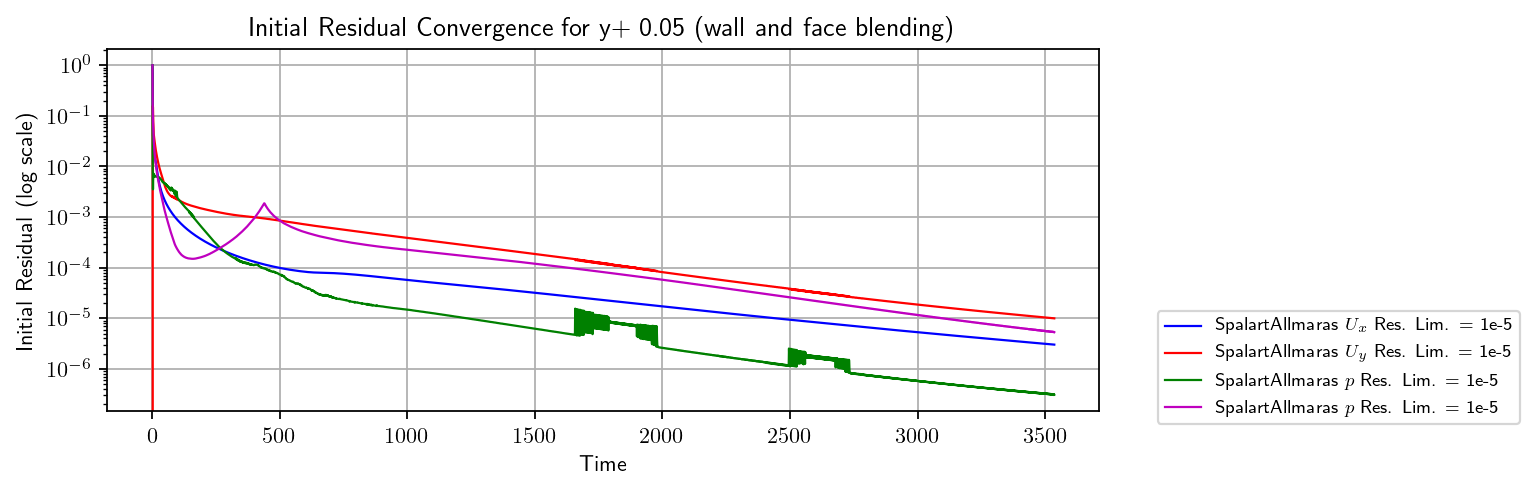

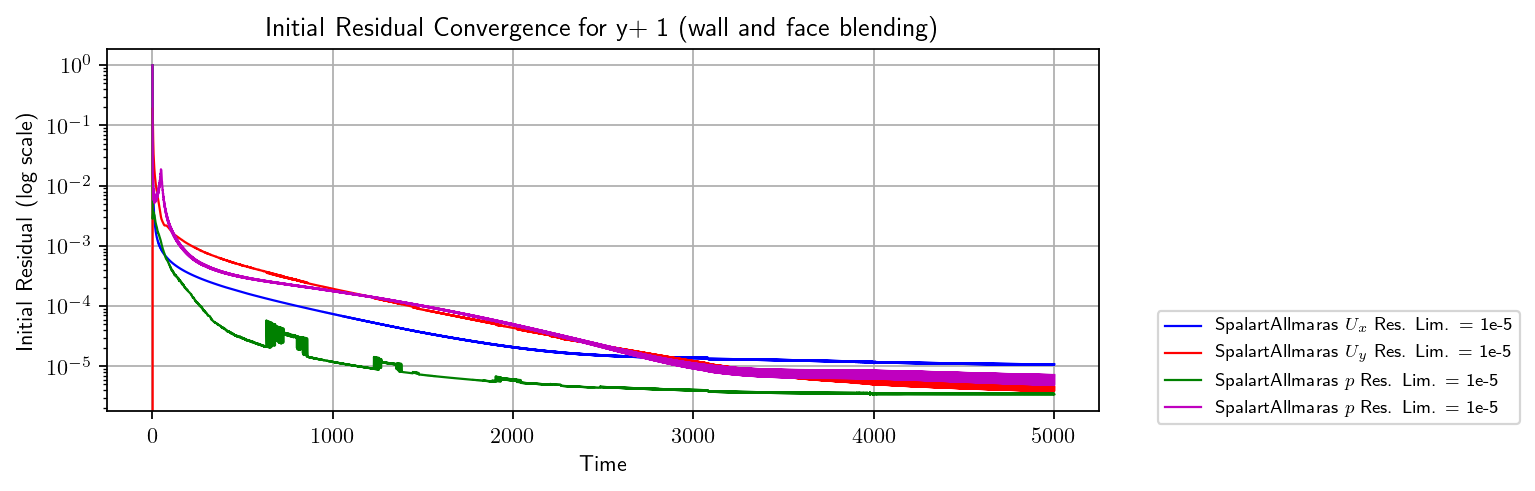

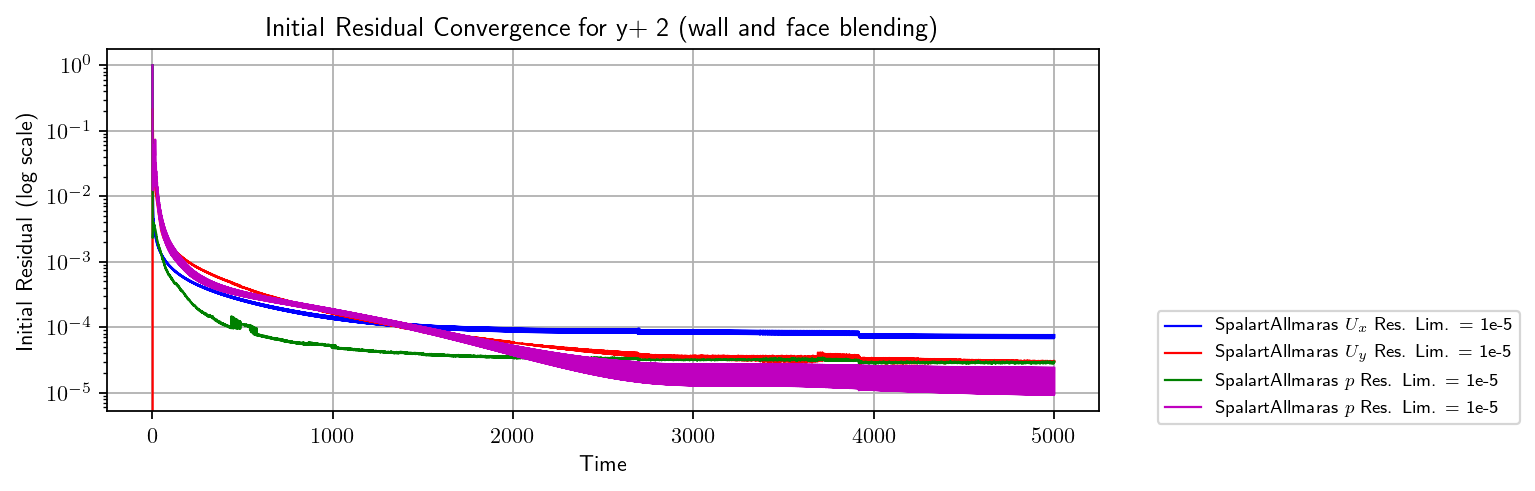

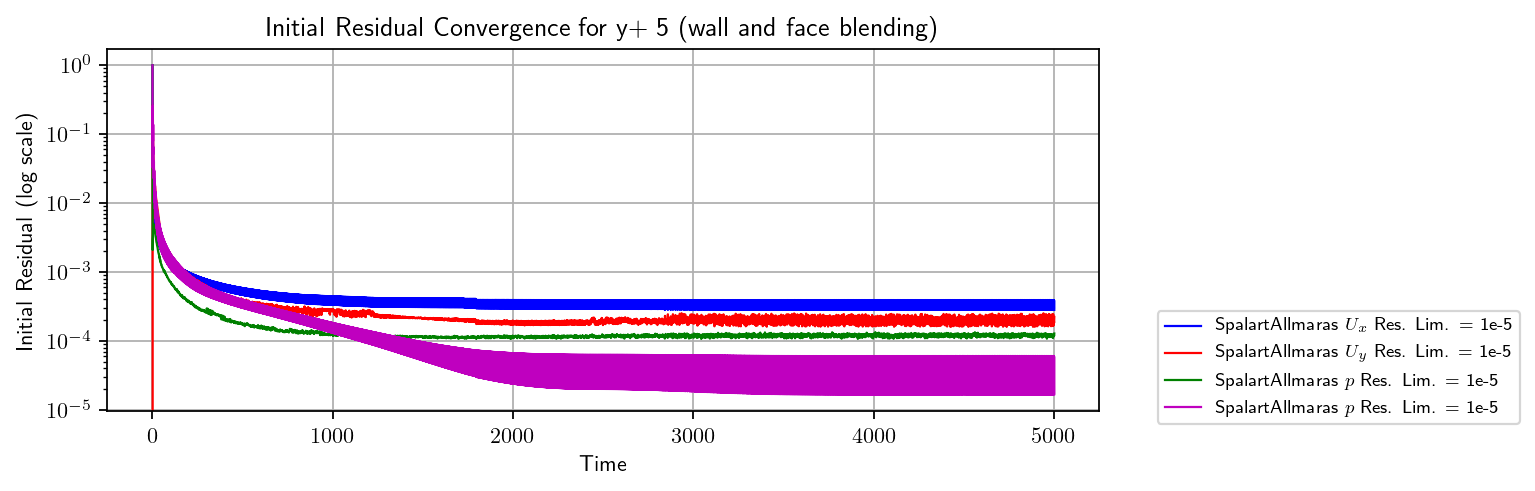

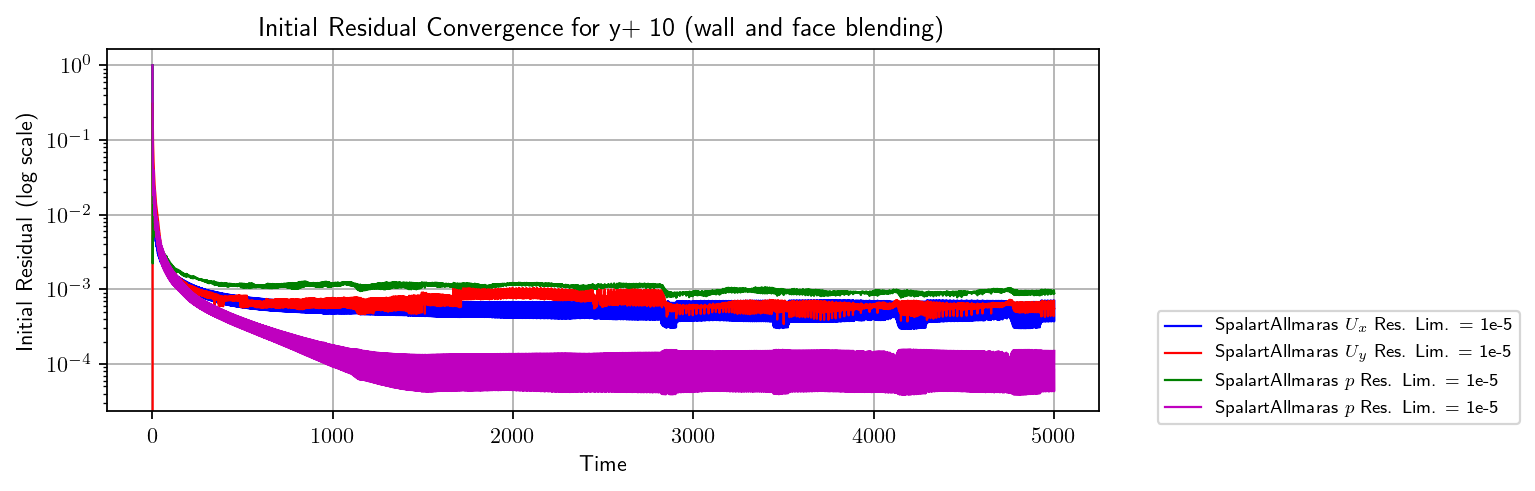

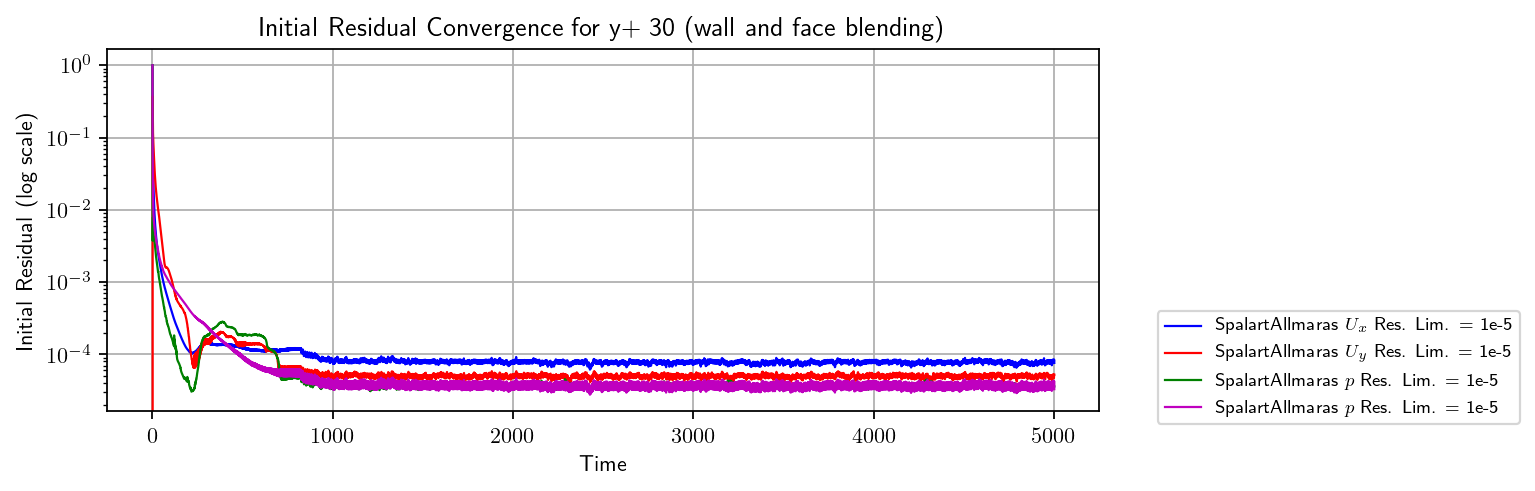

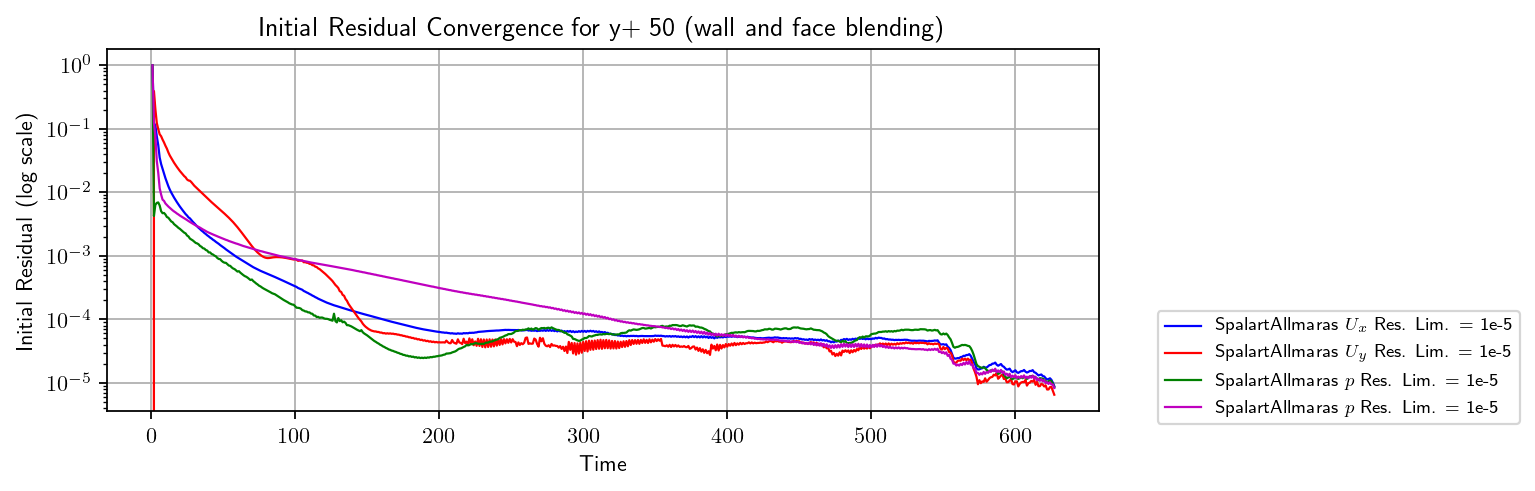

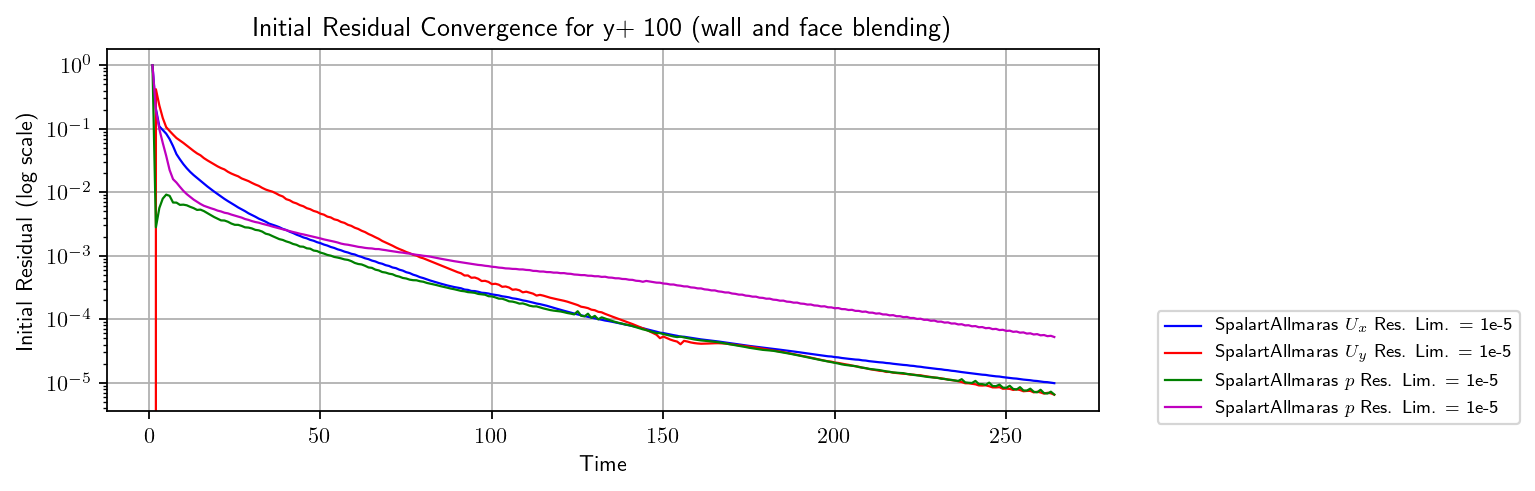

In [10]:
lw = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence for y+ {} (wall and face blending)".format(yp[j]))
        ax.set_xlabel("Time")
        ax.set_ylabel("Initial Residual (log scale)")
        ax.plot(t[i + len(res_list)*j], Ux_init_res[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], Uy_init_res[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], p_init_res[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], nuTilda_init_res[i + len(res_list)*j], color = 'm', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.3))

2. Only face blending

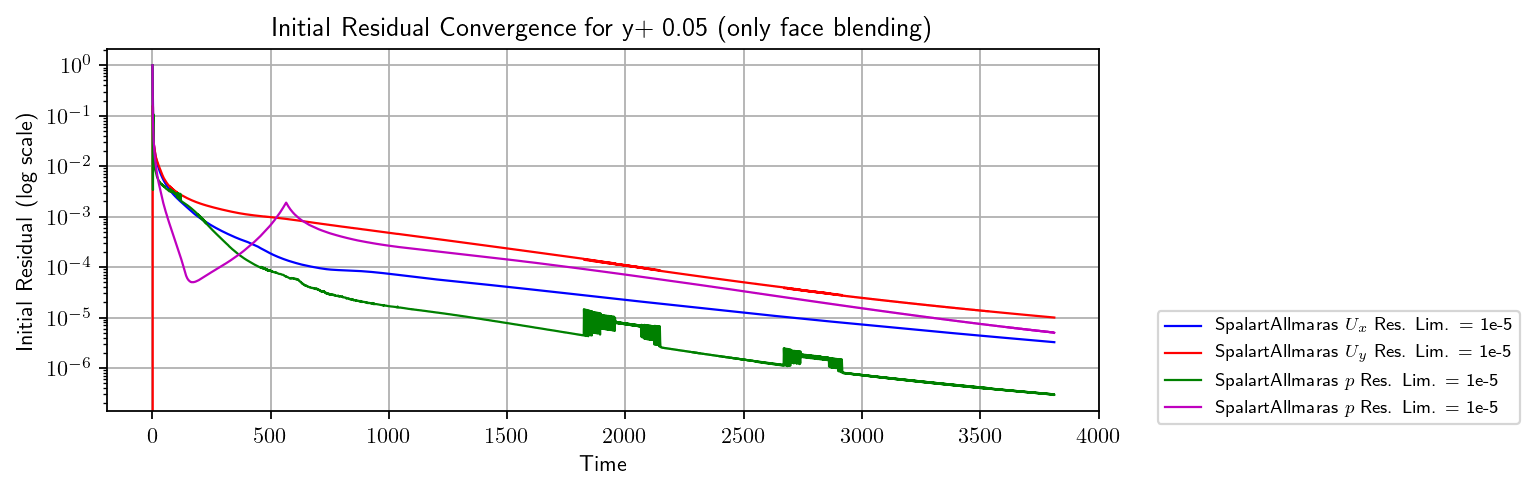

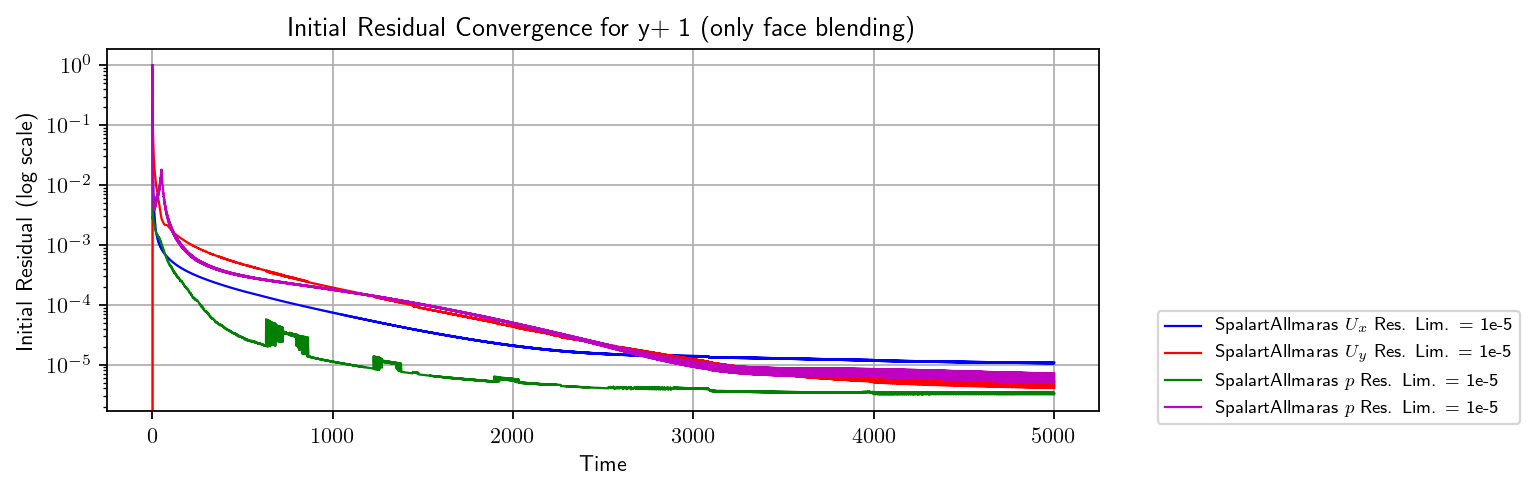

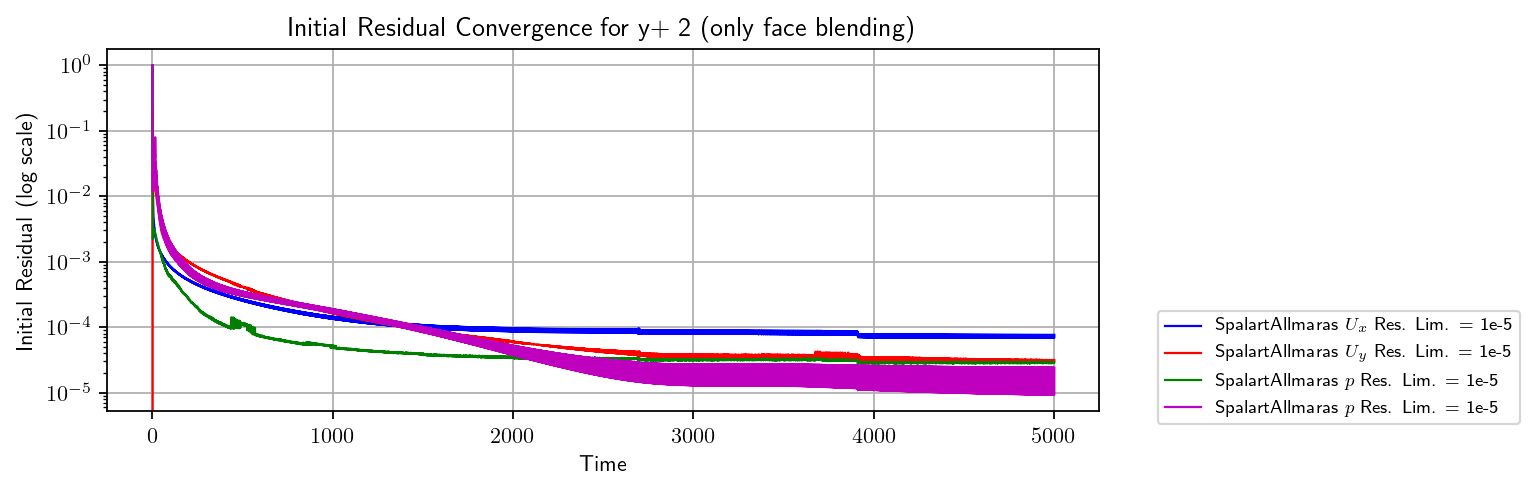

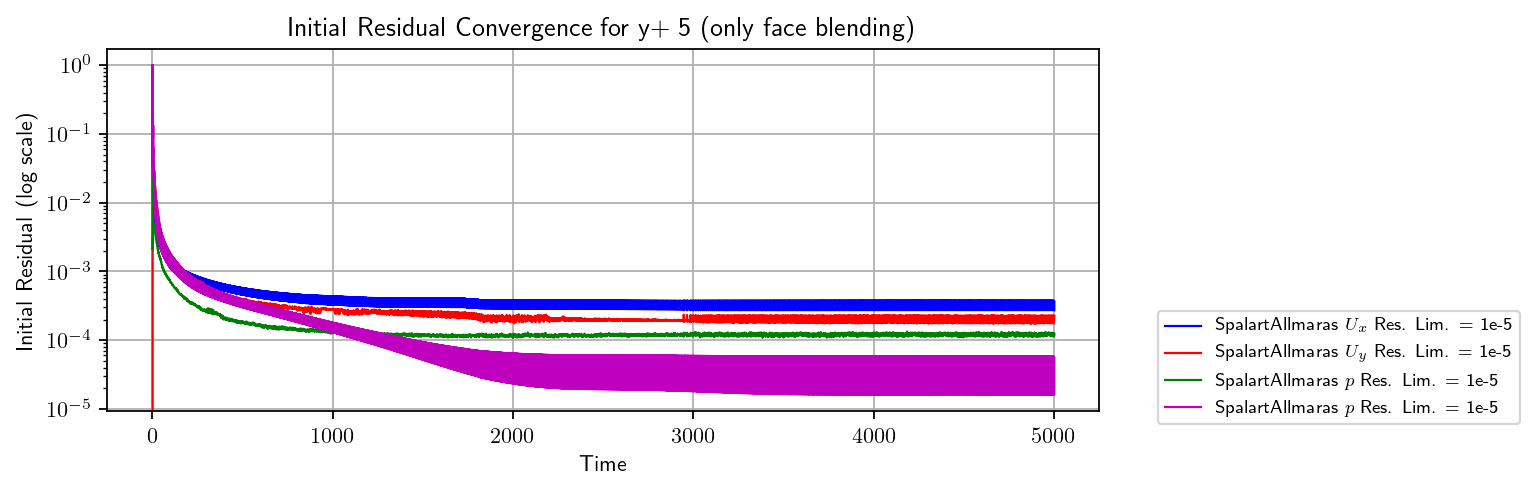

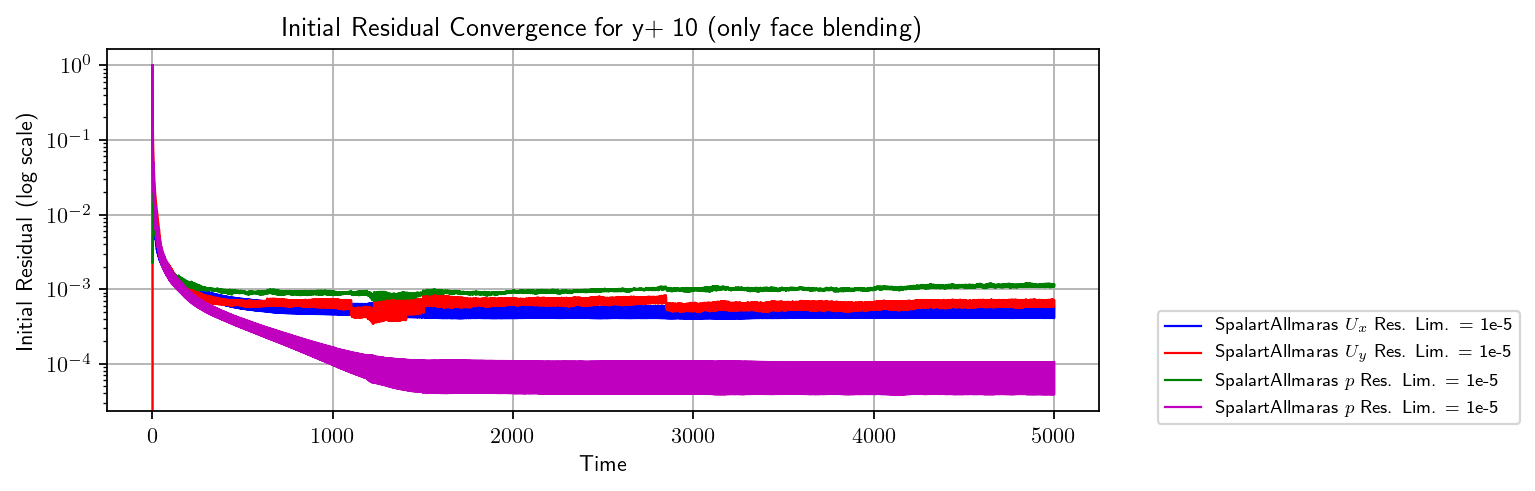

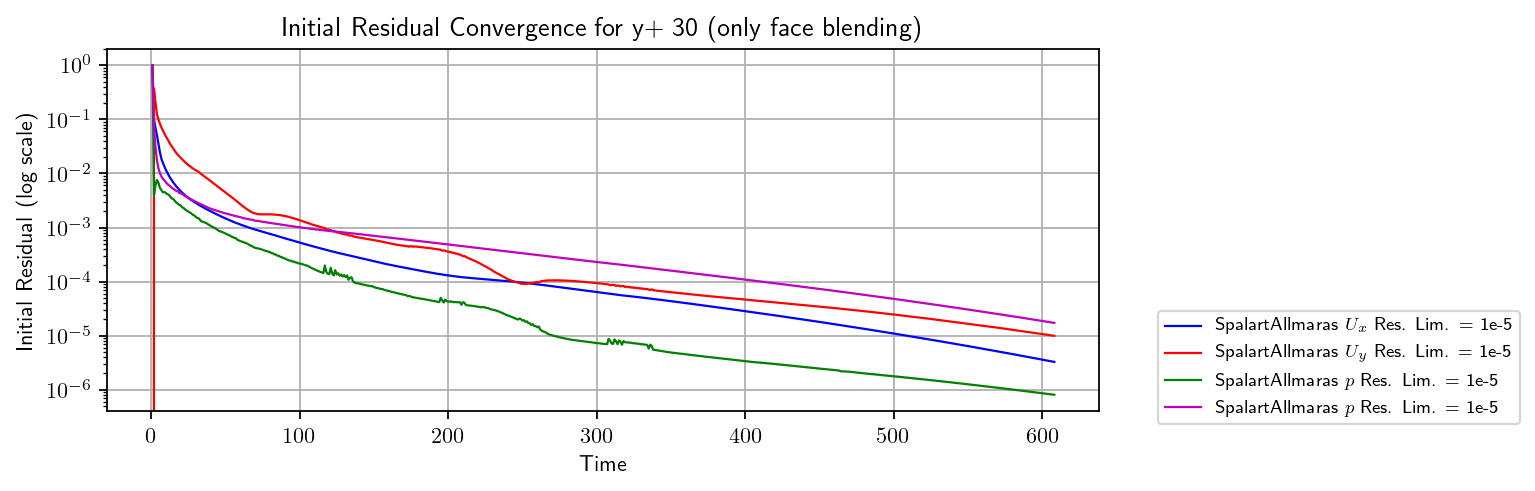

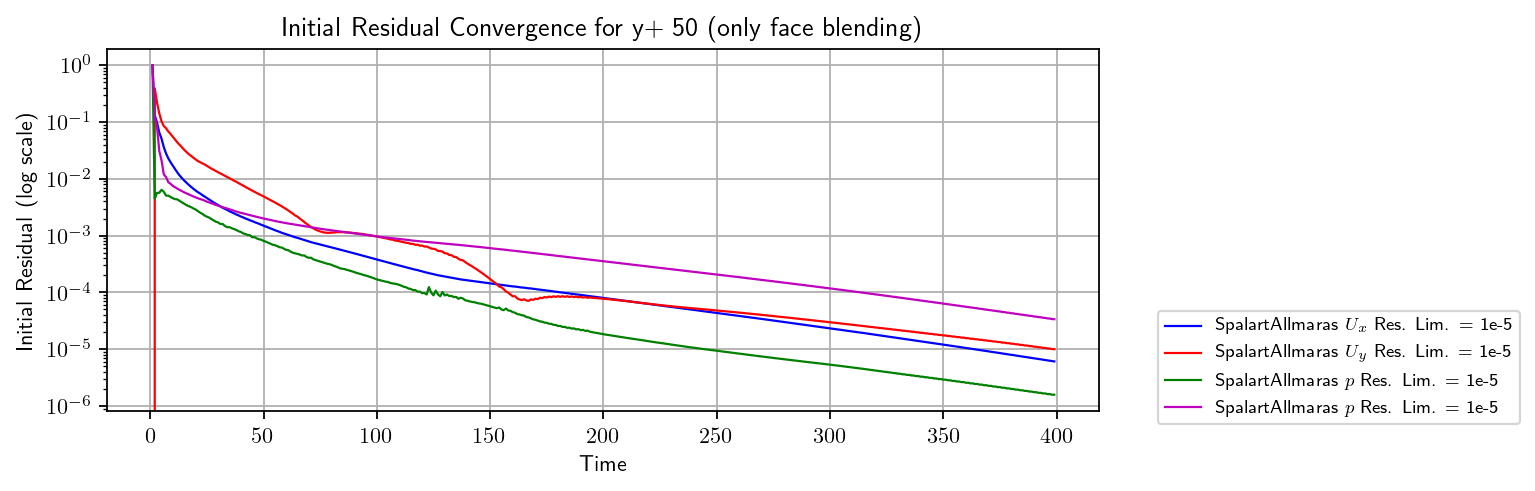

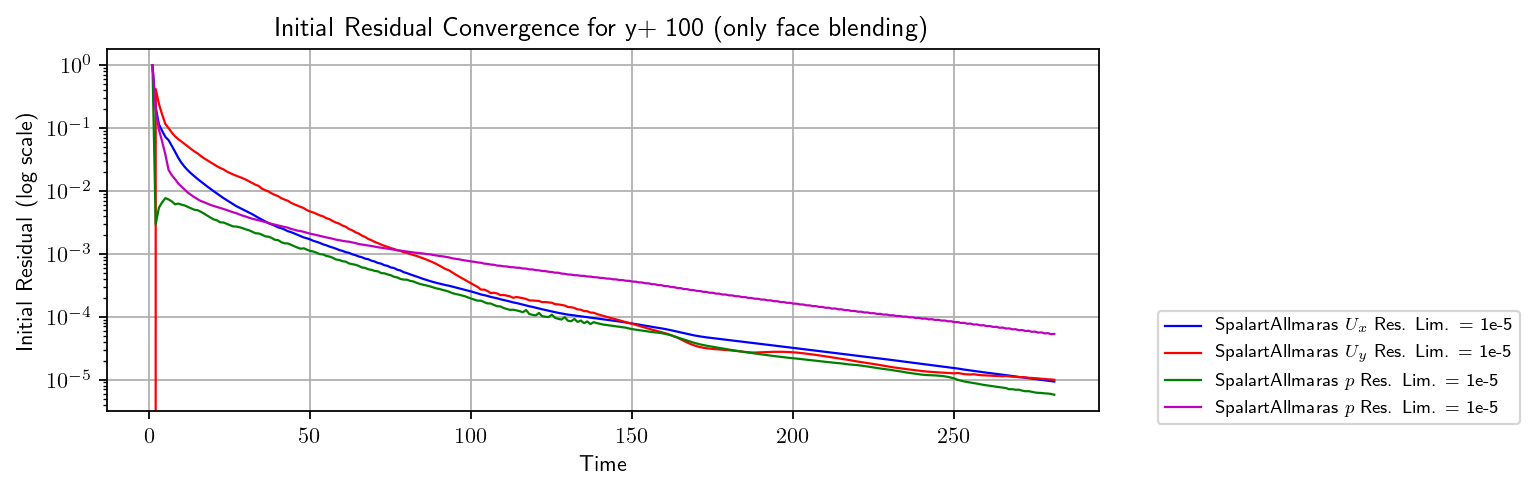

In [11]:
lw2 = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence for y+ {} (only face blending)".format(yp[j]))
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Initial Residual (log scale)")
        ax2.plot(t2[i + len(res_list)*j], Ux_init_res2[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t2[i + len(res_list)*j], Uy_init_res2[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t2[i + len(res_list)*j], p_init_res2[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.plot(t2[i + len(res_list)*j], nuTilda_init_res2[i + len(res_list)*j], color = 'm', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.3))        